# Machine Learning Exersize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib notebook

# Loading Datasets

In [2]:
train_data=pd.read_csv('C:/Users/om/Desktop/train.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_test=pd.read_csv('C:/Users/om/Desktop/test.csv')

In [5]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Visualisation

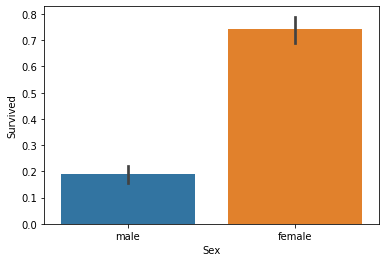

In [6]:
sns.barplot(x='Sex',y='Survived',data=train_data)

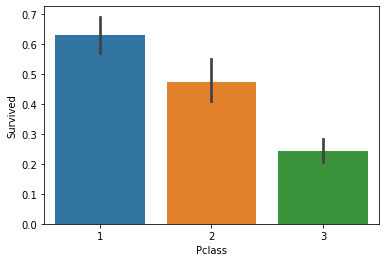

In [7]:
sns.barplot(x='Pclass',y='Survived',data=train_data)

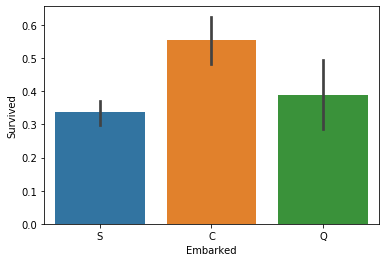

In [8]:
sns.barplot(x='Embarked',y='Survived',data=train_data)

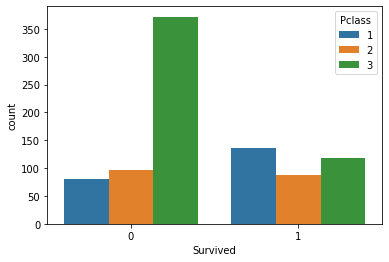

In [9]:
sns.countplot(x='Survived',hue='Pclass',data=train_data)

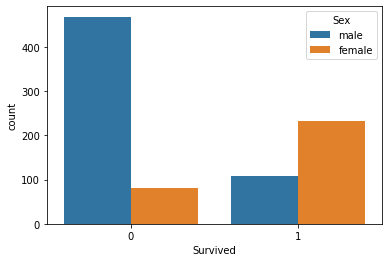

In [10]:
sns.countplot(x='Survived',hue='Sex',data=train_data)

# Data Cleaning

In [11]:
# deleting the features which is not directly affectng on the result
Ntrain_data=train_data.drop(train_data[['Name','PassengerId','Parch','Fare','Cabin','Ticket','SibSp']],axis=1)
Ntrain_data.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [12]:
#Assign the Sex features values from string to integer
Ntrain_data['Sex'] = Ntrain_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [13]:
#Checking the null values in the datatset
Ntrain_data.isnull().sum()
Ntrain_data.dropna(inplace=True)

In [14]:
Ntrain_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [15]:
#Assign the 'Embarked' feature with integer from string
Ntrain_data['Embarked'] = Ntrain_data['Embarked'].map( {'S':1,'C':2,'Q':3} ).astype(int)

In [16]:
Ntrain_data.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,1
1,1,1,1,38.0,2
2,1,3,1,26.0,1
3,1,1,1,35.0,1
4,0,3,0,35.0,1


# Building Logistic Regression model

In [17]:
X=Ntrain_data[['Pclass','Sex','Age','Embarked']]
Y=Ntrain_data['Survived']
X_test=data_test[['Pclass','Sex','Age','Embarked']]

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\om\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Checking the Accuracy model

In [20]:
#cheching accuracy for test data
logreg.score(x_test,y_test)

0.797752808988764

In [23]:
#checking accuracy for train data
logreg.score(x_train,y_train)

0.7827715355805244

# Prediction on new dataset

In [21]:
logreg.predict([[3,0,35.0,1]])

array([0], dtype=int64)